In [1]:
pip install numpy pandas scikit-learn matplotlib nltk seaborn wordcloud ensemble


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ischy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1') #using latin-1 for proper encoding
df.sample(10)
#df.shape

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5242,ham,Hmm thinking lor...,NaN,NaN,NaN
1729,ham,Lol yeah at this point I guess not,NaN,NaN,NaN
5020,ham,:-( sad puppy noise,NaN,NaN,NaN
360,ham,Ha ha cool cool chikku chikku:-):-DB-),NaN,NaN,NaN
2601,ham,Okie,NaN,NaN,NaN
774,ham,Just sleeping..and surfing,NaN,NaN,NaN
4597,ham,I'm stuck in da middle of da row on da right h...,NaN,NaN,NaN
191,ham,I'm sorry. I've joined the league of people th...,NaN,NaN,NaN
541,ham,A famous quote : when you develop the ability ...,NaN,NaN,NaN
4326,ham,Dude got a haircut. Now its breezy up there,NaN,NaN,NaN


Data Cleaning

In [6]:
#Dropping unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

#Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [7]:
df['target'] = encoder.fit_transform(df['target']) #ham 0, spam 1
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#df.isnull().sum()

In [9]:
#df.duplicated().sum() #403 duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum() #0 duplicate values
#df.shape

np.int64(0)

Exploratory Data Analysis

In [10]:
df['target'] .value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1c2cf5b5d30>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

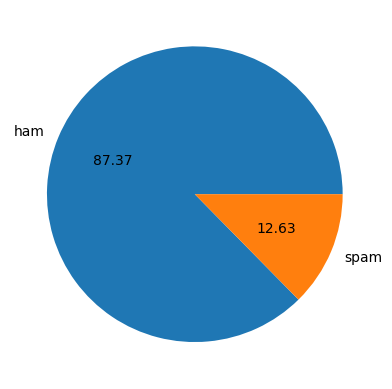

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
#Imbalanced dataset

In [12]:
df['num_char'] = df['text'].apply(len)
df['num_words'] =  df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [13]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
df[df['target'] == 0] [['num_char', 'num_words', 'num_sentences']].describe() #ham

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
df[df['target'] == 1] [['num_char', 'num_words', 'num_sentences']].describe() #spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

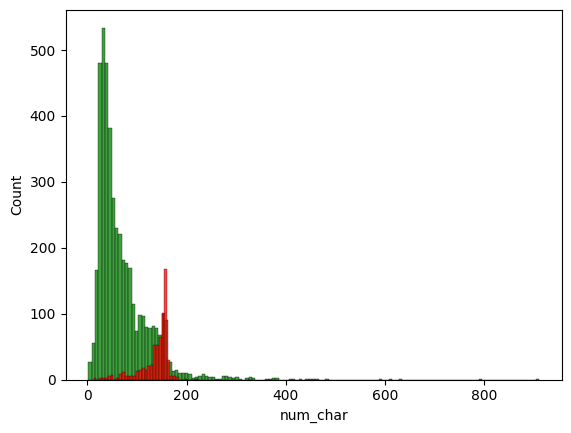

In [16]:
#Graphical view for ham/spam
sns.histplot(df[df['target'] == 0]['num_char'], color='green')
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

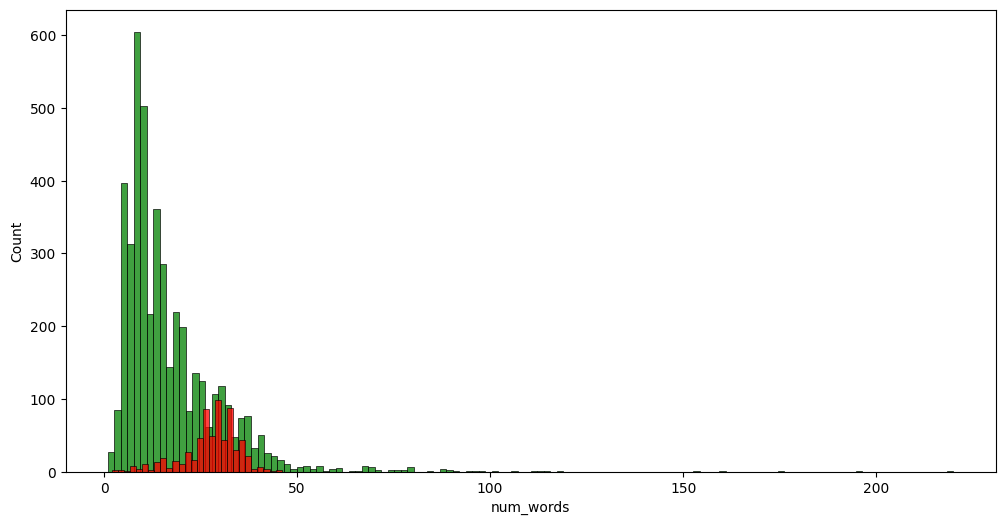

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

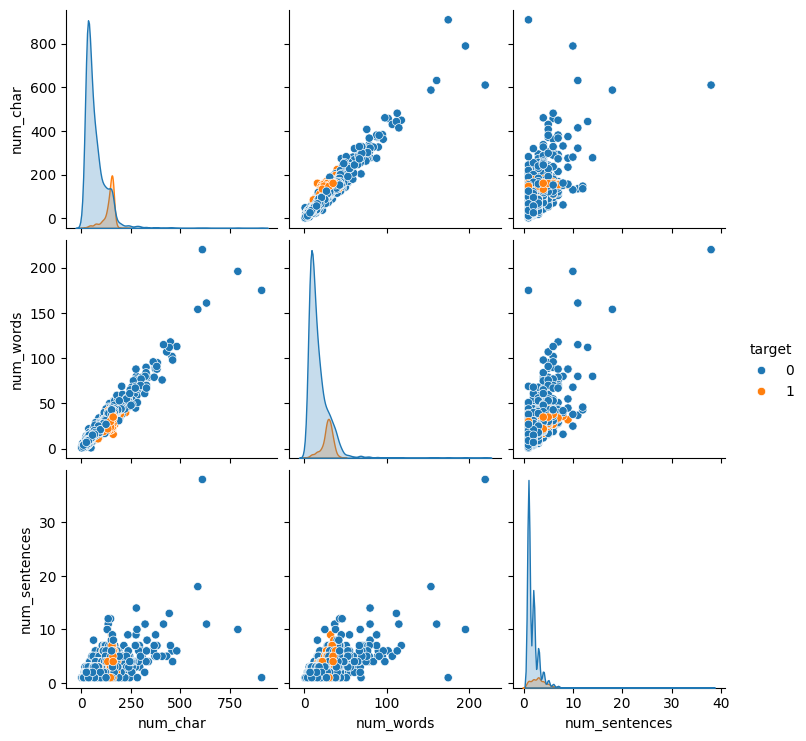

In [18]:
#Advanced visualization for graphical view
sns.pairplot(df, hue='target')

<Axes: >

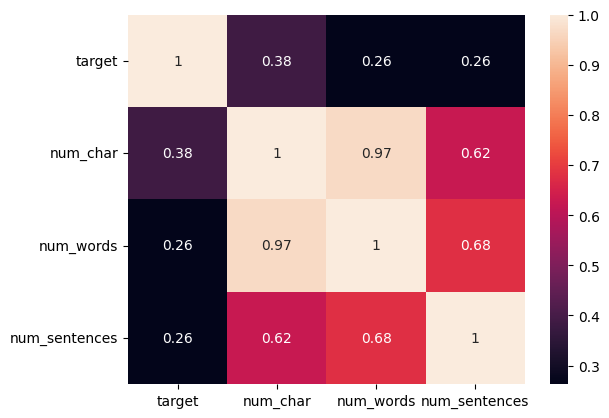

In [19]:
#Numeric column correlation
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True) 

Text Preprocessing

In [20]:
def transform_text(text):
    #Lowering case
    text = text.lower()
    
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #Removing special characters
    c = []
    for char in text:
        if char.isalnum(): c.append(char)
    
    #Removing stop words and punctuation
    from nltk.corpus import stopwords
    from string import punctuation
    text = c[:]
    c.clear()
    for char in text:
        if char not in stopwords.words('english') and char not in punctuation:
            c.append(char)
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    text = c[:]
    c.clear()
    for char in text:
        c.append(ps.stem(char))
    return " ".join(c)


In [21]:
transform_text('Hello friends, how are you doing today? I am doing fine!')

'hello friend today fine'

In [22]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Word Visibility

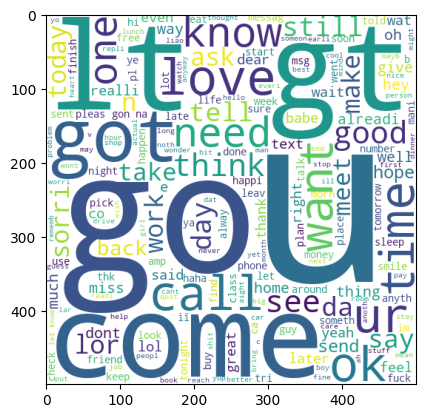

In [23]:
from wordcloud import WordCloud
#Ham word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

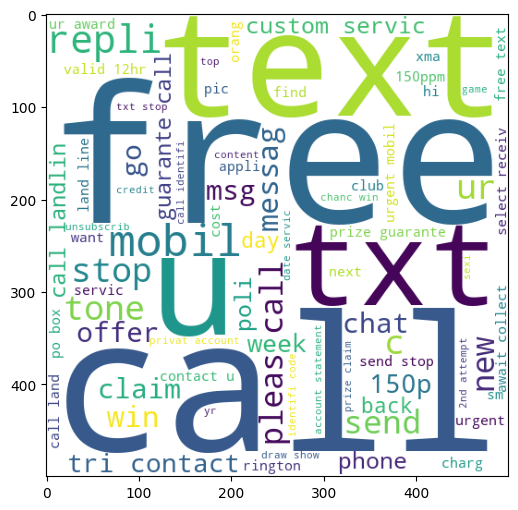

In [24]:
#Spam word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [25]:
#Spam messages list
from collections import Counter

spam_list = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_list.append(words)
#len(spam_list)
Counter(spam_list).most_common(10) #Most common spam words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

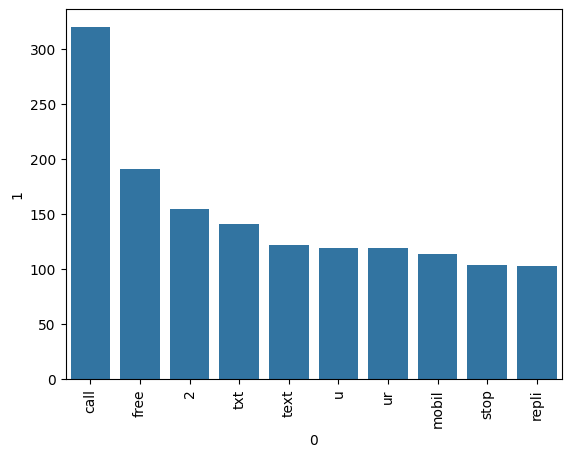

In [26]:
#Top 10 spam words visualization
sns.barplot(x=pd.DataFrame(Counter(spam_list).most_common(10))[0], 
            y=pd.DataFrame(Counter(spam_list).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

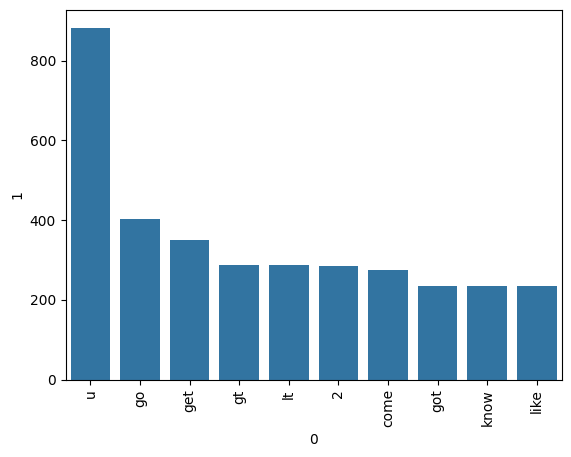

In [27]:
ham_list = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_list.append(words)

Counter(ham_list).most_common(10) #Most common ham words
sns.barplot(x=pd.DataFrame(Counter(ham_list).most_common(10))[0], 
            y=pd.DataFrame(Counter(ham_list).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
tfidf = TfidfVectorizer(max_features=3000)

In [29]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
knc = KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
lrc = LogisticRegression(max_iter=1000, random_state=42)

In [31]:
#Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))
print(precision_score(y_test, y_predict1))
print(classification_report(y_test, y_predict1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.52      0.82      0.63       138

    accuracy                           0.87      1034
   macro avg       0.74      0.85      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [32]:
#Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))
print(precision_score(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [33]:
#Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(confusion_matrix(y_test, y_predict3))
print(precision_score(y_test, y_predict3))
print(classification_report(y_test, y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [34]:
#K-Nearest Neighbors
knc.fit(X_train, y_train)
y_predict4 = knc.predict(X_test)
print(accuracy_score(y_test, y_predict4))
print(confusion_matrix(y_test, y_predict4))
print(precision_score(y_test, y_predict4))
print(classification_report(y_test, y_predict4))

0.9052224371373307
[[896   0]
 [ 98  40]]
1.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.29      0.45       138

    accuracy                           0.91      1034
   macro avg       0.95      0.64      0.70      1034
weighted avg       0.91      0.91      0.88      1034



In [35]:
#Extra Trees Classifier
etc.fit(X_train, y_train)
y_predict5 = etc.predict(X_test)
print(accuracy_score(y_test, y_predict5))
print(confusion_matrix(y_test, y_predict5))
print(precision_score(y_test, y_predict5))
print(classification_report(y_test, y_predict5))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [36]:
#Logistic Regression Classifier
lrc.fit(X_train, y_train)
y_predict6 = lrc.predict(X_test)
print(accuracy_score(y_test, y_predict6))
print(confusion_matrix(y_test, y_predict6))
print(precision_score(y_test, y_predict6))
print(classification_report(y_test, y_predict6))

0.9526112185686654
[[894   2]
 [ 47  91]]
0.978494623655914
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       0.98      0.66      0.79       138

    accuracy                           0.95      1034
   macro avg       0.96      0.83      0.88      1034
weighted avg       0.95      0.95      0.95      1034



In [37]:
classifiers = {
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'KNC': knc,
    'ETC': etc,
    'LRC': lrc
}


def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


accuracy_scores = []
precision_scores = []
classifier_names = []


for name, clf in classifiers.items():
    curr_accuracy, curr_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(name)
    print("Accuracy:", curr_accuracy)
    print("Precision:", curr_precision)
    print()
    
    classifier_names.append(name)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)
plt.figure(figsize=(10,5))

GNB
Accuracy: 0.8733075435203095
Precision: 0.5159817351598174

MNB
Accuracy: 0.9709864603481625
Precision: 1.0

BNB
Accuracy: 0.9835589941972921
Precision: 0.991869918699187

KNC
Accuracy: 0.9052224371373307
Precision: 1.0

ETC
Accuracy: 0.9787234042553191
Precision: 0.9754098360655737

LRC
Accuracy: 0.9526112185686654
Precision: 0.978494623655914



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [38]:
performance_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values(by='Accuracy', ascending=False)
performance_df

,Classifier,Accuracy,Precision
2,BNB,0.983559,0.991870
4,ETC,0.978723,0.975410
1,MNB,0.970986,1.000000
5,LRC,0.952611,0.978495
3,KNC,0.905222,1.000000
0,GNB,0.873308,0.515982


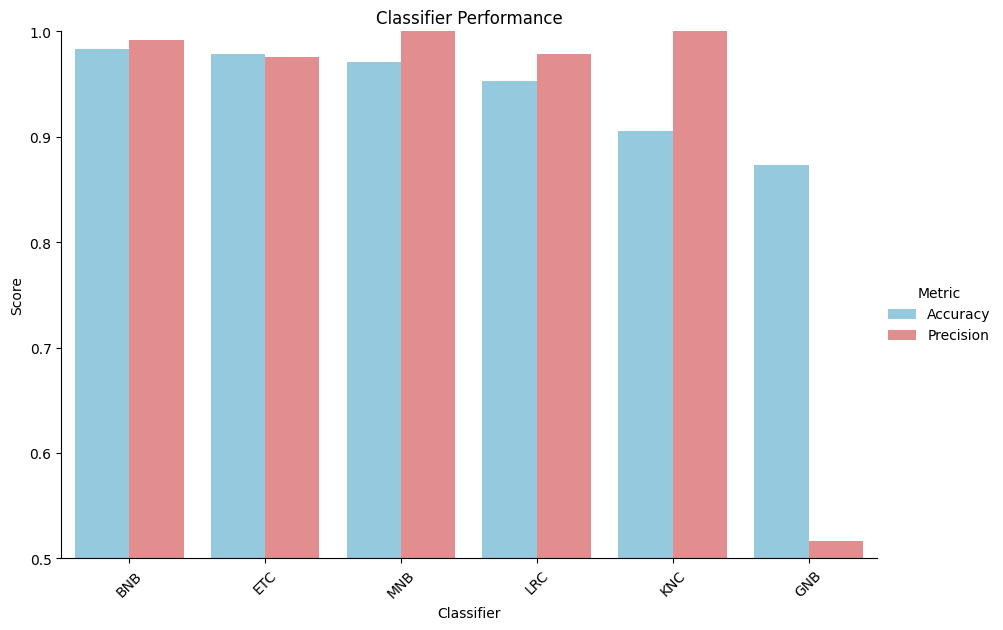

In [39]:
#Melting into long format
performance_df_melted = pd.melt(
    performance_df, 
    id_vars=['Classifier'], 
    value_vars=['Accuracy', 'Precision'],
    var_name='Metric', 
    value_name='Value'
)

g = sns.catplot(
    x='Classifier', 
    y='Value', 
    hue='Metric', 
    data=performance_df_melted, 
    kind='bar',
    dodge=True,
    height=6, 
    aspect=1.5,
    palette={'Accuracy': 'skyblue', 'Precision': 'lightcoral'}
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.title('Classifier Performance')
plt.ylabel('Score')
plt.show()

In [41]:
from pathlib import Path
import pickle

#Define paths
model_dir = Path("../backend/model")
model_dir.mkdir(parents=True, exist_ok=True)

#Save files
pickle.dump(tfidf, open(model_dir / 'vectorizer.pkl', 'wb'))
pickle.dump(mnb, open(model_dir / 'model.pkl', 'wb'))
